# Weather detection system

## Introduction

![](https://www.weather.gov/images/jetstream/clouds/cu.jpg)

Weather is the state of the atmosphere, describing for example the degree to which it is hot or cold, wet or dry, calm or stormy, clear or cloudy{1]. The weather of any given region is important because it has a considerable impact on the water, sunlight and temperature of an ecosystem. Weather conditions can be both a force for good and at times can cause real damages. Certain weather patterns can also cause dangerous storms and natural disasters

## Problem statement

Bad weather is also a very common cause of most road accidents. Such accidensts occur in adverse condition such as sleet, snow, rain, fog, winds or on slick pavement.
Weather-related vehicle accidents contribute to a far higher number of deaths in the United States than large-scale weather disasters, including tornadoes, hurricanes and flooding. The U.S. Department of Transportation (DOT) said more than 5.8 million vehicle crashes occur each year based on statistics from 2007 to 2016. About 21 percent of those, or just over 1.2 million, involved hazardous weather [2]. 

I want to build a deep learning weather lassification system that will be able to predict the weather conditions at any given time, this way precautions could be taken ahead of time to prevent disaters or accidents

## Project objective

Creating a deep learning model using Convolutional neural network (CNN)  that predicts the weather conditions at a given time. Convolutional neural network (CNN) is a class of deep neural networks, mostly applied to analyzing visual imagery. I will be making use of important CNN libraries such as keras.  Keras is an open-source software  library that provides a python interface for artificial neural networks.


## Multi-class weather dataset

The data is from Mendeley data. The dataset was published on 13-09-2018 by Ajay Gbeminiyi.

It is a valuable dataset used in the research paper entitled “Multi-class weather recognition from still image using heterogeneous ensemble method” [3]. The dataset provides a platform for outdoor weather analysis by extracting various features for recognizing different weather conditions.
My dataset is unstructured. it is divided into 4 classes which includes: cloudy, shiny, rainy, and sunrise. 

Link to dataset website: https://data.mendeley.com/datasets/4drtyfjtfy/1

Link to dataset:   https://data.mendeley.com/public-files/datasets/4drtyfjtfy/files/a03e6097-f7fb-4e1a-9c6a-8923c6a0d3e0/file_downloaded


In [1]:
# Neededd Libraries

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2 as cv #cv2.imshow() method is used to display an image in a window. The window automatically fits to the image size.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from pathlib import Path 
from sklearn.model_selection import train_test_split 
from keras.models import Sequential 
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
import tensorflow as tf
import keras
from sklearn.metrics import confusion_matrix, classification_report 
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import img_to_array
from matplotlib import pyplot
from numpy import expand_dims
from keras.preprocessing.image import ImageDataGenerator

In [4]:
#Represents the weather images in Windows file system paths.
cloudy_dir = Path('/Users/mbahc/OneDrive/Desktop/Weather classification/dataset2/cloudy')
rainy_dir = Path('/Users/mbahc/OneDrive/Desktop/Weather classification/dataset2/rainy')
shiny_dir = Path('/Users/mbahc/OneDrive/Desktop/Weather classification/dataset2/shiny')
sunrise_dir = Path('/Users/mbahc/OneDrive/Desktop/Weather classification/dataset2/sunrise')

## Dataframe

In [5]:
def generate_df(image_dir, label):
    filepaths = pd.Series(list(image_dir.glob(r'*.jpg')), name='Filepath').astype(str)
    labels = pd.Series(label, name='Label', index=filepaths.index)
    df = pd.concat([filepaths, labels], axis=1)
    return df

A function generate_df is called that takes in input as  image_dir and label

It creat two series; filepath and Labels

It retrurns a dataframe df

In [6]:
#Concatenate the four dataframes 
cloudy_df = generate_df(cloudy_dir, label="cloudy")
rainy_df = generate_df(rainy_dir, label="rainy")
shiny_df = generate_df(shiny_dir, label='shiny')
sunrise_df = generate_df(sunrise_dir, label='sunrise')
all_df = pd.concat([cloudy_df, rainy_df, shiny_df, sunrise_df], axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
all_df

,Filepath,Label
0,\Users\mbahc\OneDrive\Desktop\Weather classifi...,sunrise
1,\Users\mbahc\OneDrive\Desktop\Weather classifi...,cloudy
2,\Users\mbahc\OneDrive\Desktop\Weather classifi...,shiny
3,\Users\mbahc\OneDrive\Desktop\Weather classifi...,cloudy
4,\Users\mbahc\OneDrive\Desktop\Weather classifi...,cloudy
...,...,...
1117,\Users\mbahc\OneDrive\Desktop\Weather classifi...,shiny
1118,\Users\mbahc\OneDrive\Desktop\Weather classifi...,sunrise
1119,\Users\mbahc\OneDrive\Desktop\Weather classifi...,sunrise
1120,\Users\mbahc\OneDrive\Desktop\Weather classifi...,cloudy


## Data exploration

In [7]:
all_df.shape

(1122, 2)

In [8]:
# my dataset has 869 rows, 2 columns

In [9]:
all_df.head()

,Filepath,Label
0,\Users\mbahc\OneDrive\Desktop\Weather classifi...,sunrise
1,\Users\mbahc\OneDrive\Desktop\Weather classifi...,cloudy
2,\Users\mbahc\OneDrive\Desktop\Weather classifi...,shiny
3,\Users\mbahc\OneDrive\Desktop\Weather classifi...,cloudy
4,\Users\mbahc\OneDrive\Desktop\Weather classifi...,cloudy


In [10]:
all_df.tail()

,Filepath,Label
1117,\Users\mbahc\OneDrive\Desktop\Weather classifi...,shiny
1118,\Users\mbahc\OneDrive\Desktop\Weather classifi...,sunrise
1119,\Users\mbahc\OneDrive\Desktop\Weather classifi...,sunrise
1120,\Users\mbahc\OneDrive\Desktop\Weather classifi...,cloudy
1121,\Users\mbahc\OneDrive\Desktop\Weather classifi...,sunrise


In [11]:
all_df.sample(5)

,Filepath,Label
528,\Users\mbahc\OneDrive\Desktop\Weather classifi...,sunrise
1061,\Users\mbahc\OneDrive\Desktop\Weather classifi...,shiny
640,\Users\mbahc\OneDrive\Desktop\Weather classifi...,cloudy
816,\Users\mbahc\OneDrive\Desktop\Weather classifi...,cloudy
80,\Users\mbahc\OneDrive\Desktop\Weather classifi...,cloudy


In [12]:
all_df.isnull().sum()

Filepath    0
Label       0
dtype: int64

In [13]:
# No data is missing

## Splitting my dataset into test and train

In [14]:
np.random.seed(0) # ensures when we put same seed, we get the same pattern of random numbers.
train_df, test_df = train_test_split(all_df,
    train_size=0.8,
    shuffle=True,
    random_state=1
)

In [15]:
# random_state ensures every time we run the code we get thesame values

In [16]:
train_df.shape, test_df.shape

((897, 2), (225, 2))

In [17]:
# Initialising the generators for train and test data 
# The rescale parameter ensures the input range in [0, 1]
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.10,
    rotation_range = 90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.2, 1.0],
    fill_mode = 'nearest'
    
    
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

## Creating generator with batch size 64

In [18]:
# Creating the generators with each batch of size = 64 images 
# The train_df  contains input classes 
# Here it is 'Positive' and 'Negative' so class_mode is binary 
# The target size is the size of  input images, each image will be resized to this size
# shuffle: Whether to shuffle the data. Default: True. If set to False, sorts the data in alphanumeric order.
# batch_size: Size of the batches of data. Default: 32.
# color mode is RGB
#The batch size defines the number of samples that will be propagated through the network at an instant.


train_data = train_gen.flow_from_dataframe(
    train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=32,
    subset='training'
)

Found 808 validated image filenames belonging to 4 classes.


In [19]:
val_data = train_gen.flow_from_dataframe(
    train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=42,
    subset='validation'
)

Found 89 validated image filenames belonging to 4 classes.


In [20]:
test_data = test_gen.flow_from_dataframe(
    test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=False,
    seed=42
)

Found 225 validated image filenames belonging to 4 classes.


Text(0.5, 1.0, 'Frequency of each label')

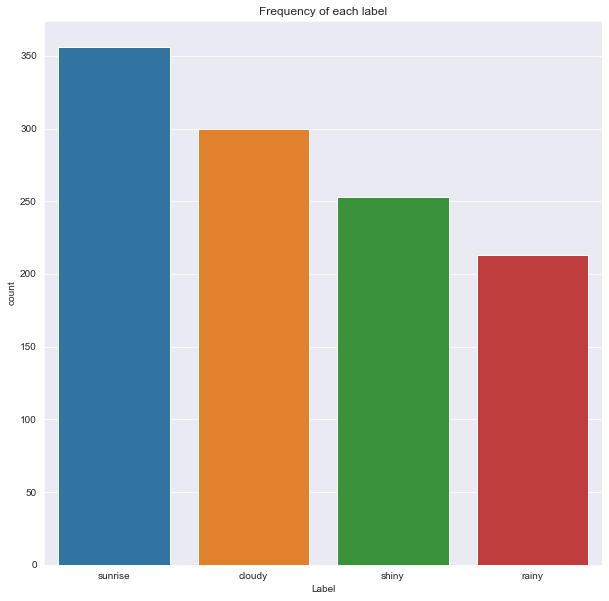

In [21]:
# label count
plt.figure(figsize = (10,10)) 
sns.set_style("darkgrid")
sns.countplot(all_df['Label'])
plt.title("Frequency of each label")

### Preview of weather images in train_df

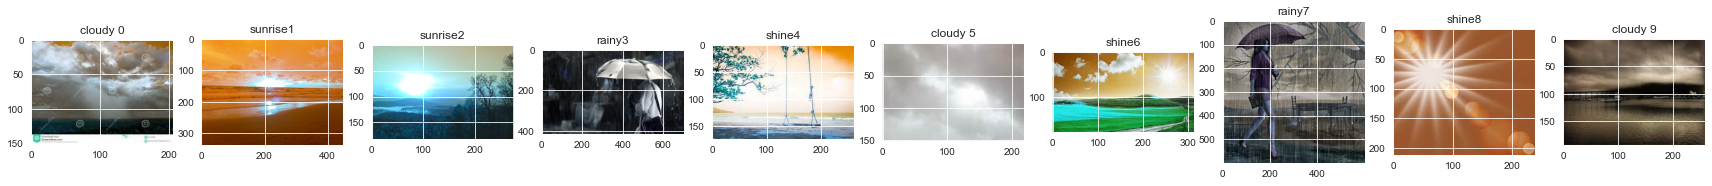

In [22]:
fig,a =  plt.subplots(1,10)
fig.set_figheight(30)
fig.set_figwidth(30)
for i in range(10):
    img = cv.imread(str(train_df.iloc[i]['Filepath']))
    a[i].imshow(img)
    if train_df.iloc[i]['Label']=='cloudy':
        title = "cloudy " + str(i)
    if train_df.iloc[i]['Label']=='shiny':
        title = "shine" + str(i)
    if train_df.iloc[i]['Label']=='sunrise':
        title = 'sunrise' + str(i)
    if train_df.iloc[i]['Label']=='rainy':
        title="rainy" + str(i)
    a[i].set_title(title)

### Preview of weather images in test_df

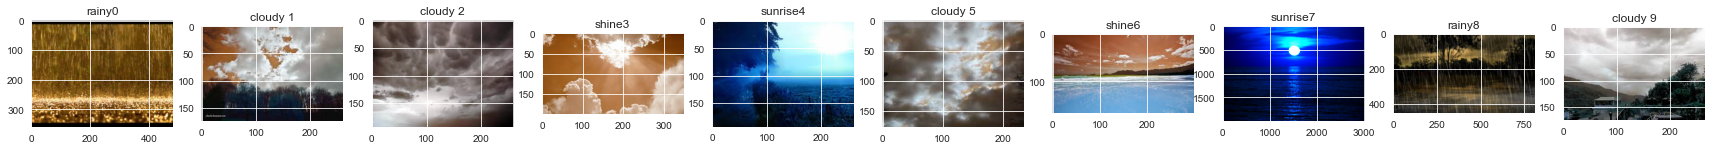

In [23]:
fig,a =  plt.subplots(1,10)
fig.set_figheight(30)
fig.set_figwidth(30)
for i in range(10):
    img = cv.imread(str(test_df.iloc[i]['Filepath']))
    a[i].imshow(img)
    if test_df.iloc[i]['Label']=='cloudy':
        title = "cloudy " + str(i)
    if test_df.iloc[i]['Label']=='shiny':
        title = "shine" + str(i)
    if test_df.iloc[i]['Label']=='sunrise':
        title = 'sunrise' + str(i)
    if test_df.iloc[i]['Label']=='rainy':
        title="rainy" + str(i)
    a[i].set_title(title)

In [24]:
train_df.shape

(897, 2)

## Building the CNN model

The  lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers
    
COV2D: Keras Conv2D is a 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.
    
As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. Color_channels refers to (R,G,B). I will configure my model to process inputs of shape (128, 128, 3). This is done  by passing the argument input_shape to our first layer.

The output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument. Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(120, 120, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 118, 118, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 57, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


### Dense layer

Feed the last output tensor from the convolutional base (of shape (28, 28, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. This dataset has 4 output classes, so you use a final Dense layer with 4 outputs.

In [27]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 118, 118, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 57, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

## Compiling and training the model

In [29]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
history = model.fit(train_data, validation_data = val_data, epochs=30)

Epoch 1/30
13/13 [==============================] - 11s 872ms/step - loss: 1.1581 - accuracy: 0.4876 - val_loss: 1.0276 - val_accuracy: 0.4607
Epoch 2/30
13/13 [==============================] - 11s 840ms/step - loss: 0.8631 - accuracy: 0.6101 - val_loss: 0.7919 - val_accuracy: 0.6629
Epoch 3/30
13/13 [==============================] - 15s 1s/step - loss: 0.6914 - accuracy: 0.7587 - val_loss: 0.7055 - val_accuracy: 0.7303
Epoch 4/30
13/13 [==============================] - 14s 1s/step - loss: 0.5866 - accuracy: 0.7760 - val_loss: 0.6054 - val_accuracy: 0.7753
Epoch 5/30
13/13 [==============================] - 13s 1s/step - loss: 0.5909 - accuracy: 0.7822 - val_loss: 0.5523 - val_accuracy: 0.7640
Epoch 6/30
13/13 [==============================] - 13s 1s/step - loss: 0.5646 - accuracy: 0.7908 - val_loss: 0.5215 - val_accuracy: 0.8652
Epoch 7/30
13/13 [==============================] - 13s 1s/step - loss: 0.5193 - accuracy: 0.8045 - val_loss: 0.4789 - val_accuracy: 0.8090
Epoch 8/30
13/

## Model Evaluation on the Test Set

In [31]:
(ls, acc)=model.evaluate(test_data)

4/4 [==============================] - 1s 244ms/step - loss: 0.4204 - accuracy: 0.8533


### The test accuracy is 89.79%

## VIsualizing the accuracy and loss of my model 
Putting my model evaluation into perspective by plotting the accuracy and loss plots of the training and validation data:

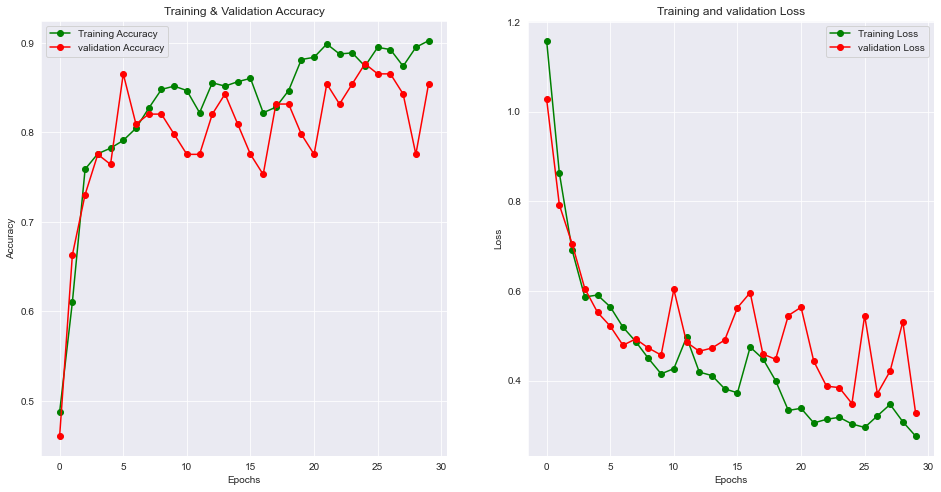

In [32]:
epochs = [i for i in range(30)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,8)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'validation Loss')
ax[1].set_title('Training and validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [33]:
# Dictionary  that maps the class labels to the index of the prediction vector that we get as the output when we use
label_map = (test_data.class_indices)
label_map

{'cloudy': 0, 'rainy': 1, 'shiny': 2, 'sunrise': 3}

## Predict labels

In [34]:
y_pred1 = model.predict(test_data)

In [35]:
y_pred1 = model.predict(test_data)
y_pred2=np.argmax(np.round(y_pred1),axis=1)
y_pred2

array([1, 0, 0, 2, 3, 0, 2, 3, 1, 0, 3, 2, 1, 3, 0, 3, 1, 1, 1, 2, 3, 3,
       3, 2, 2, 1, 1, 1, 2, 2, 1, 0, 3, 2, 1, 3, 0, 2, 2, 2, 2, 1, 3, 1,
       2, 1, 3, 1, 3, 3, 3, 2, 2, 2, 0, 1, 3, 1, 3, 1, 1, 1, 3, 2, 3, 1,
       0, 3, 3, 1, 0, 0, 3, 2, 3, 0, 1, 0, 3, 3, 2, 2, 2, 3, 1, 2, 1, 0,
       1, 2, 1, 1, 2, 3, 3, 3, 3, 3, 3, 2, 0, 2, 1, 1, 2, 1, 0, 1, 3, 1,
       3, 2, 0, 3, 2, 3, 2, 3, 3, 3, 3, 2, 1, 2, 2, 3, 1, 3, 0, 3, 2, 3,
       1, 3, 0, 3, 2, 2, 1, 1, 3, 2, 3, 0, 0, 1, 2, 2, 1, 1, 2, 1, 1, 2,
       3, 1, 3, 1, 0, 0, 2, 2, 0, 1, 2, 0, 2, 3, 0, 3, 2, 2, 0, 2, 0, 2,
       3, 1, 3, 3, 3, 0, 1, 3, 2, 2, 3, 0, 3, 0, 1, 3, 0, 3, 3, 3, 3, 0,
       1, 2, 3, 3, 1, 3, 3, 2, 0, 0, 1, 2, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1,
       2, 2, 1, 1, 2], dtype=int64)

## Confusion matrix

In [36]:
cm = confusion_matrix(test_data.labels, y_pred2)

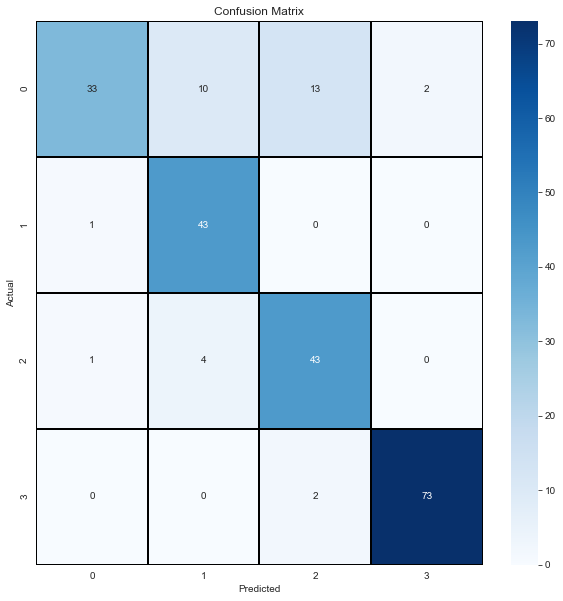

In [37]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()  

## Classification report

In [38]:
clr = classification_report(test_data.labels, y_pred2, target_names=["cloudy", "rainy", "shiny", "sunrise"])
print(clr)

              precision    recall  f1-score   support

      cloudy       0.94      0.57      0.71        58
       rainy       0.75      0.98      0.85        44
       shiny       0.74      0.90      0.81        48
     sunrise       0.97      0.97      0.97        75

    accuracy                           0.85       225
   macro avg       0.85      0.85      0.84       225
weighted avg       0.87      0.85      0.85       225



## References

1] Wikipedia. (2021, April 19). Weather. Retrieved from Wikipedia: https://en.wikipedia.org/wiki/Weather

[2] Dolce, C. (2018, 11 15). Weather-Related Vehicle Accidents Far More Deadly Than Tornadoes, Hurricanes, Floods. Retrieved from The Weather Channel: https://weather.com/safety/winter/news/weather-fatalities-car-crashes-accidents-united-states

[3] Ajayi, Gbeminiyi (2018), “Multi-class Weather Dataset for Image Classification”, Mendeley Data, V1, doi: 10.17632/4drtyfjtfy.1